### Lab: Support Vector Machine
### Armen Khachatrian
### CS663: Machine Learning

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

> Cross Validation: Linear Support Vector Classification and Gaussian Radial Basis Function 

In [2]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.svm import SVC

cv_rbf = cross_val_score(svm.SVC(kernel='rbf', gamma='auto', C=1), X, y, cv=5)
cv_rbf = np.mean(cv_rbf)

cv_Linear = cross_val_score(svm.LinearSVC(C=1), X, y, cv=5)
cv_Linear = np.mean(cv_Linear)

list_score = [cv_rbf, cv_Linear]
print('Score (5 Fold CV): using Gaussian Radial Basis Function:', list_score[0])
print('Score (5 Fold CV): using Linear Support Vector Classification:', list_score[1])

Score (5 Fold CV): using Gaussian Radial Basis Function: 0.9800000000000001
Score (5 Fold CV): using Linear Support Vector Classification: 0.9666666666666668


/Users/a.khachatryan/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/a.khachatryan/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/a.khachatryan/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/a.khachatryan/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/a.khachatryan/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed

> Define plot function:

In [3]:
import matplotlib.pyplot as plt
def plot_SVC(f1, f2):
    X = iris.data[:, [f1,f2]]  #f1,f2 - features
    y = iris.target

    rbf_svc = svm.SVC(kernel='rbf', gamma='auto', C=1).fit(X, y) #SVM using dif kernels
    lin_svc = svm.LinearSVC(C=1).fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    #h = (x_max / x_min)/100 step size in the mesh
    h = 0.02

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h)) # Mesh

    titles = ['SVC Linear', 'SVC with RBF kernel'] # title plots

    for i, clf in enumerate((lin_svc, rbf_svc)):

        plt.figure(figsize=(12,12)).add_subplot(2, 2, i + 1)# to enhance plots
        plt.subplots_adjust(wspace=0.4, hspace=0.4)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.PuBuGn, alpha=0.8)# plot hyperplanes

        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm) # plot also points
        plt.xlabel(columns_name[f1])
        plt.ylabel(columns_name[f2])
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        plt.title('{}\nScore:{:<3.3f} '.format(titles[i], list_score[i]))

    plt.show()

> Plots: Score shows the performance. Y and X axis -> coolumns of the dataset

/Users/a.khachatryan/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


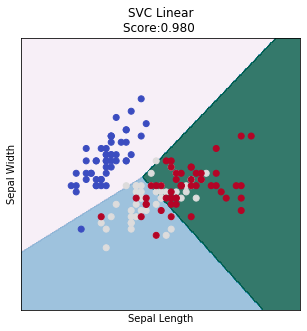

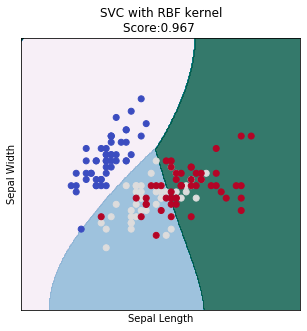

/Users/a.khachatryan/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


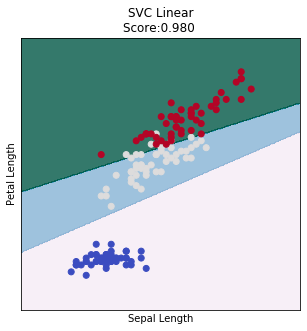

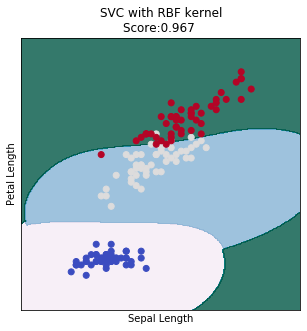

/Users/a.khachatryan/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


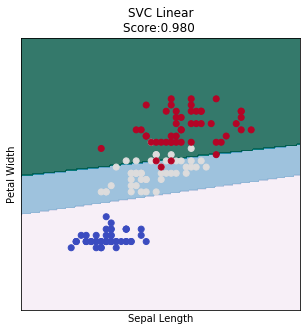

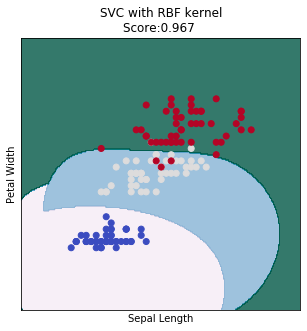

/Users/a.khachatryan/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


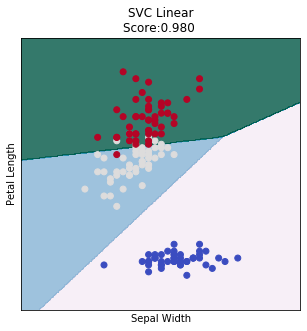

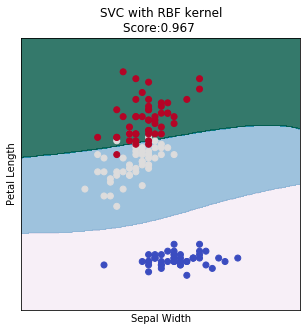

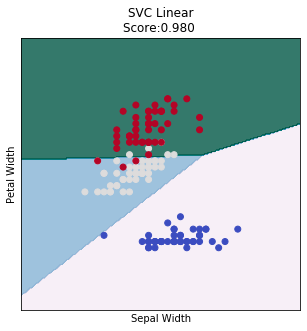

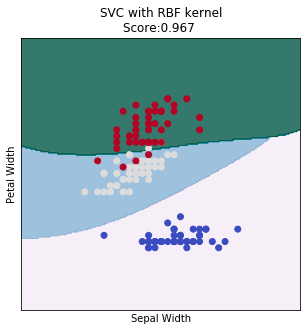

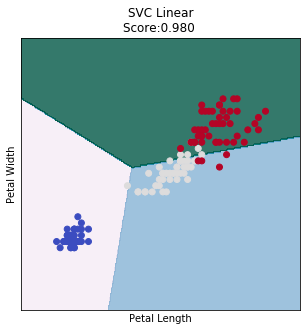

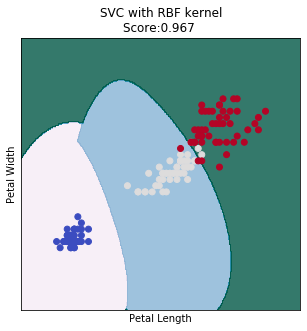

In [4]:
columns_name = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'] #from IRIS dataset
for f1 in np.arange(4):
    for f2 in np.arange(f1+1, 4):
        plot_SVC(f1,f2)

**Note** : I was expected to have 6 plots for each SVM type of kernel. I plotted the different groups and the hyperplanes by using all columns of the dataset. So it means: $C^2_4$ to choose 2 columns for plotting out of 4. $C^2_4$ = 6

### End.